### Условие задачи:

Для указанных в варианте двух функций найти точку локального
минимума, пользуясь указанными методами. Если локальных минимумов несколько,
достаточно найти только один из них. Для контроля правильности реализации методов,
используйте встроенные функции из библиотеки scipy (результат этого контроля привести
в отчете).
Сравнить методы, сделать вывод.
Построить графики минимизируемых функций в виде поверхности таким образом,
чтобы был виден искомый локальный минимум. Для каждого из методов нанести точками
на контурный график функции последовательность приближений.

Функции:  
1. $f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$
2. $f(x_1,x_2)=100(x_2-x_1^2)^2+(1-x_1)^2, x^*=(1;1)$ - функция Розенброка  

Методы:  
1. Метод Хука-Дживса
2. Метод Марквардта

### Построение графиков функций:

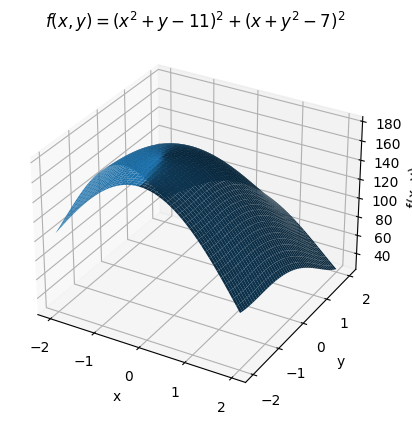

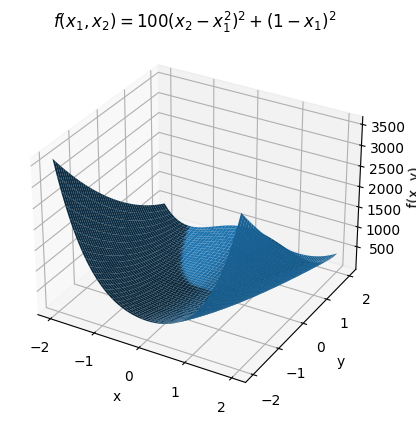

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize


def func_1(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def plot_func_1():
    x_values = np.linspace(-2, 2)
    y_values = np.linspace(-2, 2)
    
    xg, yg = np.meshgrid(x_values, y_values)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(xg, yg, func_1([xg, yg]), rstride=1, cstride=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('$f(x,y)=(x^2 + y - 11)^2 + (x + y^2 - 7)^2$')

def func_2(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def plot_func_2():
    x_values = np.linspace(-2, 2)
    y_values = np.linspace(-2, 2)
    
    xg, yg = np.meshgrid(x_values, y_values)
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(xg, yg, func_2([xg, yg]), rstride=1, cstride=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('f(x, y)')
    ax.set_title('$f(x_1,x_2)=100(x_2-x_1^2)^2+(1-x_1)^2$')

if __name__ == "__main__":
    plot_func_1()
    plot_func_2()
    

### Получим минимумы функций используя scipy.optimize:

In [3]:
from scipy.optimize import minimize


if __name__ == "__main__":
    func_1_min = minimize(func_1, x0=[0,0])
    func_2_min = minimize(func_2, x0=[0,0])
    
    print(func_1_min)
    print()
    print(func_2_min)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.3782324420898585e-13
        x: [ 3.000e+00  2.000e+00]
      nit: 10
      jac: [-3.950e-06 -1.191e-06]
 hess_inv: [[ 1.578e-02 -9.481e-03]
            [-9.481e-03  3.495e-02]]
     nfev: 48
     njev: 16

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.8439915001532524e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 19
      jac: [ 3.987e-06 -2.844e-06]
 hess_inv: [[ 4.948e-01  9.896e-01]
            [ 9.896e-01  1.984e+00]]
     nfev: 72
     njev: 24


Отсюда видно следующее:  

Функция: $f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$  
Точка локального минимума: (3; 2)  
Число итераций: 10  

Функция: $f(x_1,x_2)=100(x_2-x_1^2)^2+(1-x_1)^2$  
Точка локального минимума: (1; 1)  
Число итераций: 19  
### Реализуем метод Хука-Дживса:

Результат для func_1: [3. 2.], количество итераций: 9


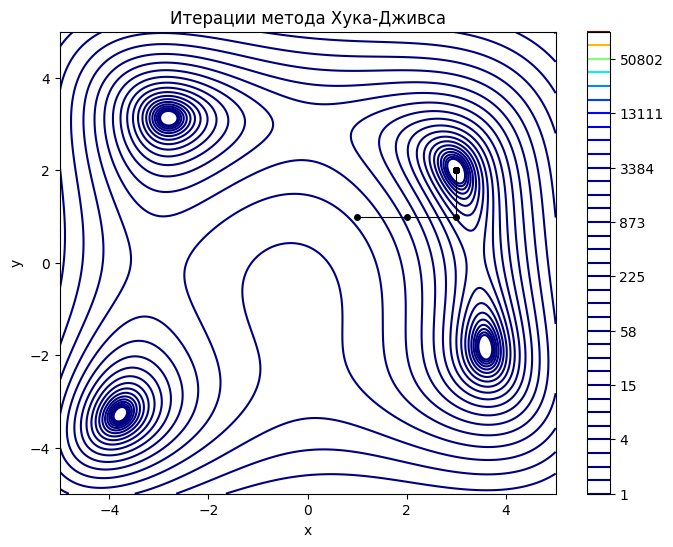

Результат для func_2: [0.997781 0.99556 ], количество итераций: 3930


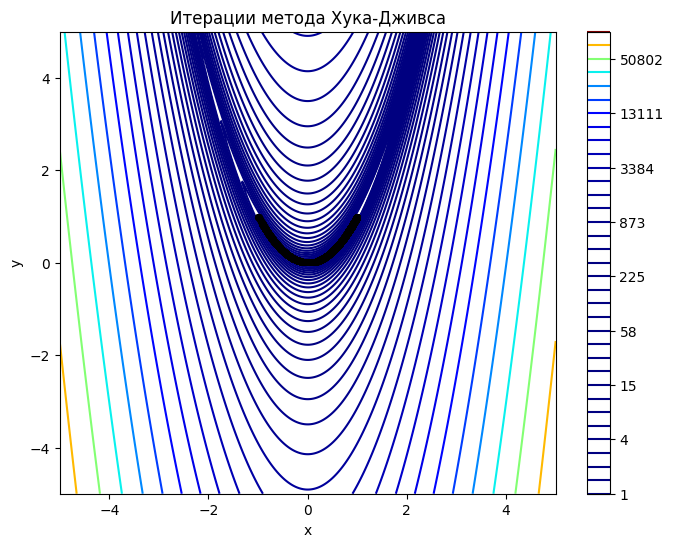

In [4]:
import numpy as np


def hook_jeeves_method(func, x0, step, eps):
    iter_counter = 0
    n = len(x0)
    b = np.array(x0)
    h = np.array([step] * n)
    x_history = [b.copy()]

    def evaluate(x):
        return func(x)

    # Поиск по образцу
    def pattern_search(x, h):
        f_best = evaluate(x)
        x_best = x.copy()

        for i in range(n):
            # Увеличение x_i
            x_new = x.copy()
            x_new[i] += h[i]
            f_new = evaluate(x_new)
            if f_new < f_best:
                f_best = f_new
                x_best = x_new

            # Уменьшение x_i
            x_new = x.copy()
            x_new[i] -= h[i]
            f_new = evaluate(x_new)
            if f_new < f_best:
                f_best = f_new
                x_best = x_new

        return x_best, f_best

    while np.any(h > eps):
        iter_counter += 1
        x_prev = b.copy()

        b, f_b = pattern_search(b, h)
        x_history.append(b.copy())

        # Если текущая точка b осталась неизменной, то длина шага уменьшается в 10 раз
        if np.allclose(b, x_prev):
            h /= 10
        # Поиск по образцу вокруг текущей точки
        else:
            x_next, f_next = pattern_search(b + 2 * (b - x_prev), h)
            if f_next < f_b:
                b = x_next
                x_history.append(b.copy())

    return x_history, iter_counter

def plot_iterations(x_history, f):
    x_history = np.array(x_history)
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    
    plt.figure(figsize=(8, 6))
    
    # levels - уровни контуров; cmap - цветовая карта
    plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
    plt.plot(x_history[:, 0], x_history[:, 1], 'ko-', markersize=4, linewidth=0.8)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Итерации метода Хука-Дживса')
    plt.show()

if __name__ == "__main__":
    x0_1 = [1.0, 1.0]
    x0_2 = [-1.0, 1.0]
    step = 1.0
    eps = 1e-6
    
    x_history_1, iter_counter_1 = hook_jeeves_method(func_1, x0_1, step, eps)
    print(f"Результат для func_1: {x_history_1[-1]}, количество итераций: {iter_counter_1}")
    plot_iterations(x_history_1, func_1)
    
    x_history_2, iter_counter_2 = result_2 = hook_jeeves_method(func_2, x0_2, step, eps)
    print(f"Результат для func_2: {x_history_2[-1]}, количество итераций: {iter_counter_2}")
    plot_iterations(x_history_2, func_2)
   

### Реализуем метод Марквардта:

Результат для func_1: [2.99999957 1.99999975], количество итераций: 16


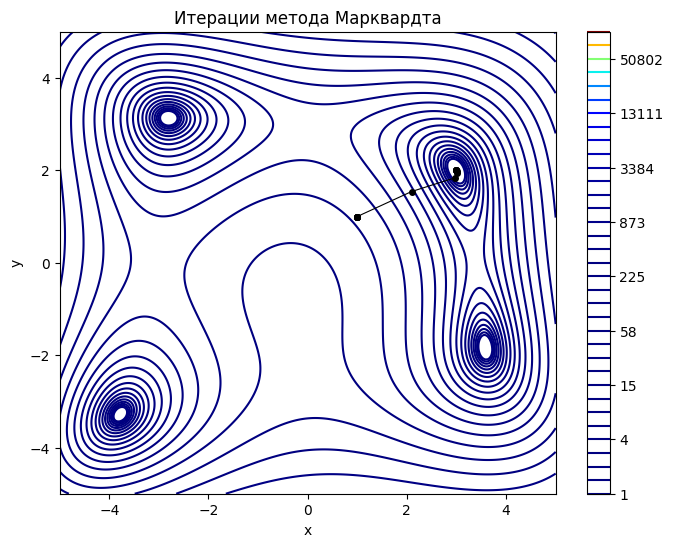

Результат для func_2: [0.99969959 0.99939877], количество итераций: 30


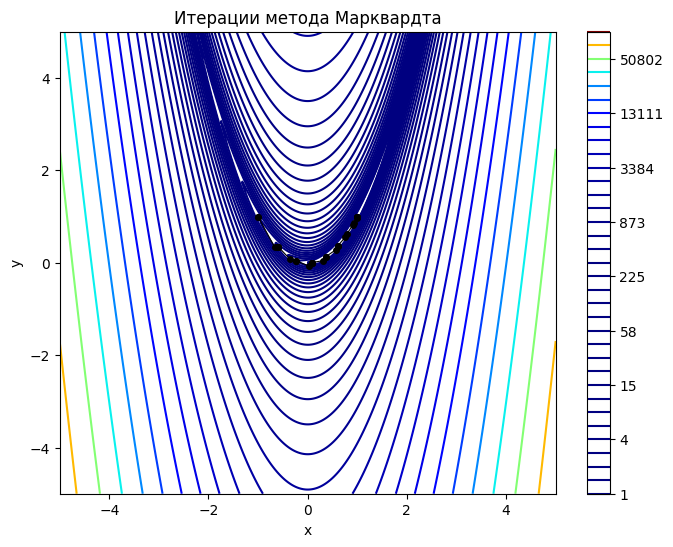

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import approx_fprime
from scipy.linalg import inv


def func_1(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def func_2(x):
    return 100*(x[1] - x[0]**2)**2 + (1 - x[0])**2

def grad_func_1(x):
    return approx_fprime(x, func_1, epsilon=1e-6)

def grad_func_2(x):
    return approx_fprime(x, func_2, epsilon=1e-6)

def hessian_func_1(x):
    hessian = np.zeros((2, 2))
    hessian[0, 0] = -42 + 12*x[0]**2 + 4*x[1]
    hessian[0, 1] = 4 * (x[0] + x[1])
    hessian[1, 0] = hessian[0, 1]
    hessian[1, 1] = -26 + 4 * x[0] + 12 * x[1]**2
    return hessian

def hessian_func_2(x):
    hessian = np.zeros((2, 2))
    hessian[0, 0] = 2 + 1200 * x[0]**2 - 400 * x[1]
    hessian[0, 1] = -400 * x[0]
    hessian[1, 0] = hessian[0, 1]
    hessian[1, 1] = 200
    return hessian

def markwardt_method(f, grad, hessian, x0, eps, M, m_0):
    iter_counter = 0
    x = x0
    k = 0
    m_k = m_0
    x_history = [x]
    
    while True:
        iter_counter += 1
        grad_f = grad(x)
        
        if np.linalg.norm(grad_f) < eps or k >= M:
            return x_history, iter_counter
        
        H_m = hessian(x) + m_k * np.eye(len(x))
                       
        x_next = x - np.dot(inv(H_m), grad_f)
        f_x_next = f(x_next)
        
        if f_x_next < f(x):
            k += 1
            m_k /= 2
            x = x_next
        else:
            m_k *= 2
            
        x_history.append(x)

def plot_iterations(x_history, f):
    x_history = np.array(x_history)
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])
    
    plt.figure(figsize=(8, 6))
    
    # levels - уровни контуров; cmap - цветовая карта
    plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')
    plt.plot(x_history[:, 0], x_history[:, 1], 'ko-', markersize=4, linewidth=0.8)
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Итерации метода Марквардта')
    plt.show()

if __name__ == "__main__":
    x0 = np.array([1, 1])  # Начальное приближение
    eps = 1e-6  # Порог для нормы градиента
    M = 100  # Предельное число итераций
    m_0 = 1  # Начальное значение параметра m_k

    x_history_1, iter_counter_1 = markwardt_method(func_1, grad_func_1, hessian_func_1, x0, eps, M, m_0)
    print(f"Результат для func_1: {x_history_1[-1]}, количество итераций: {iter_counter_1}")
    plot_iterations(x_history_1, func_1)
    
    x0 = np.array([-1, 1])  # Начальное приближение
    eps = 1e-6  # Порог для нормы градиента
    M = 100  # Предельное число итераций
    m_0 = 1  # Начальное значение параметра m_k

    x_history_2, iter_counter_2 = markwardt_method(func_2, grad_func_2, hessian_func_2, x0, eps, M, m_0)
    print(f"Результат для func_2: {x_history_2[-1]}, количество итераций: {iter_counter_2}")
    plot_iterations(x_history_2, func_2)